<a href="https://colab.research.google.com/github/Chnzhyn957366/EAI-6000---Module-4/blob/main/EAI_6000___Chen_Project_4__Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files

uploaded = files.upload()  # this will open a file chooser

Saving circles0.3.csv to circles0.3.csv
Saving halfkernel.csv to halfkernel.csv
Saving moons1.csv to moons1.csv
Saving spiral1.csv to spiral1.csv
Saving twogaussians33.csv to twogaussians33.csv
Saving twogaussians42.csv to twogaussians42.csv


In [14]:
import pandas as pd

# List of the dataset filenames
dataset_files = [
    'circles0.3.csv',
    'moons1.csv',
    'spiral1.csv',
    'twogaussians33.csv',
    'twogaussians42.csv',
    'halfkernel.csv'
]

# Dictionary to store datasets
datasets = {}

# Load each CSV
for file in dataset_files:
    data = pd.read_csv(file)
    datasets[file] = data
    print(f"{file} loaded: {data.shape}")

circles0.3.csv loaded: (1000, 3)
moons1.csv loaded: (1000, 3)
spiral1.csv loaded: (1000, 3)
twogaussians33.csv loaded: (1000, 3)
twogaussians42.csv loaded: (1000, 3)
halfkernel.csv loaded: (1000, 3)


In [15]:
#Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score

In [16]:
#Define Classifiers
# 1. LDA
lda = LinearDiscriminantAnalysis()

# 2. QDA
qda = QuadraticDiscriminantAnalysis()

# 3. Naive Bayes
nb = GaussianNB()  # Gaussian works best for continuous features

# 4. k-NN (we’ll loop k=1..20 later)

In [9]:
#Define Scoring Metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),  # multi-class safe
    'recall': make_scorer(recall_score, average='macro')
}

In [17]:
#Run 10-Fold Cross-Validation
def evaluate_classifier(X, y, clf):
    cv = KFold(n_splits=10, shuffle=True, random_state=0)
    scores = cross_validate(clf, X, y, cv=cv, scoring=scoring)

    results = {
        'accuracy': np.mean(scores['test_accuracy']),
        'precision': np.mean(scores['test_precision']),
        'recall': np.mean(scores['test_recall'])
    }

    return results

In [18]:
# Check column names
for name, df in datasets.items():
    print(name, df.columns)

circles0.3.csv Index(['x1', 'x2', 'label'], dtype='object')
moons1.csv Index(['x1', 'x2', 'label'], dtype='object')
spiral1.csv Index(['x', 'y', 'label'], dtype='object')
twogaussians33.csv Index(['x1', 'x2', 'label'], dtype='object')
twogaussians42.csv Index(['x1', 'x2', 'label'], dtype='object')
halfkernel.csv Index(['x1', 'x2', 'label'], dtype='object')


In [23]:
#Rename spiral1.csv columns to x1 and x2
from sklearn.neighbors import KNeighborsClassifier

# Ensure all datasets have consistent column names
for name, df in datasets.items():
    if 'x' in df.columns and 'y' in df.columns:
        df.rename(columns={'x': 'x1', 'y': 'x2'}, inplace=True)

In [27]:
#Run the classifiers on each dataset
classifiers = {'LDA': lda, 'QDA': qda, 'GaussianNB': nb}

results = {}

for name, df in datasets.items():
    # Handle column differences
    if 'x1' in df.columns and 'x2' in df.columns:
        X = df[['x1','x2']].values
    else:
        X = df[['x','y']].values
    y = df['label'].values

    results[name] = {}

    for clf_name, clf in classifiers.items():
        scores = evaluate_classifier(X, y, clf)
        results[name][clf_name] = scores

for dataset, clf_results in results.items():
    print(f"\nDataset: {dataset}")
    for clf, metrics in clf_results.items():
        print(f"{clf}: Accuracy={metrics['accuracy']:.4f}")


Dataset: circles0.3.csv
LDA: Accuracy=0.4490
QDA: Accuracy=0.9900
GaussianNB: Accuracy=0.9920

Dataset: moons1.csv
LDA: Accuracy=0.8820
QDA: Accuracy=0.8810
GaussianNB: Accuracy=0.8830

Dataset: spiral1.csv
LDA: Accuracy=0.7480
QDA: Accuracy=0.7470
GaussianNB: Accuracy=0.7320

Dataset: twogaussians33.csv
LDA: Accuracy=0.9850
QDA: Accuracy=0.9920
GaussianNB: Accuracy=0.9900

Dataset: twogaussians42.csv
LDA: Accuracy=0.9000
QDA: Accuracy=0.9480
GaussianNB: Accuracy=0.9050

Dataset: halfkernel.csv
LDA: Accuracy=0.6720
QDA: Accuracy=0.9360
GaussianNB: Accuracy=0.9420


In [25]:
#Test k-NN for k = 1 … 20
knn_results = {}

for name, df in datasets.items():
    X = df[['x1', 'x2']].values  # now all datasets have x1, x2
    y = df['label'].values

    knn_results[name] = {}

    for k in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        scores = evaluate_classifier(X, y, knn)
        knn_results[name][k] = scores['accuracy']  # store accuracy for plotting

# Find best k and print results for each dataset
for name, results in knn_results.items():
    best_k = max(results, key=results.get)
    best_acc = results[best_k]
    print(f"{name}: Best k = {best_k}, Accuracy = {best_acc:.4f}")

circles0.3.csv: Best k = 1, Accuracy = 1.0000
moons1.csv: Best k = 2, Accuracy = 0.9990
spiral1.csv: Best k = 3, Accuracy = 0.9950
twogaussians33.csv: Best k = 13, Accuracy = 0.9930
twogaussians42.csv: Best k = 14, Accuracy = 0.9460
halfkernel.csv: Best k = 1, Accuracy = 1.0000


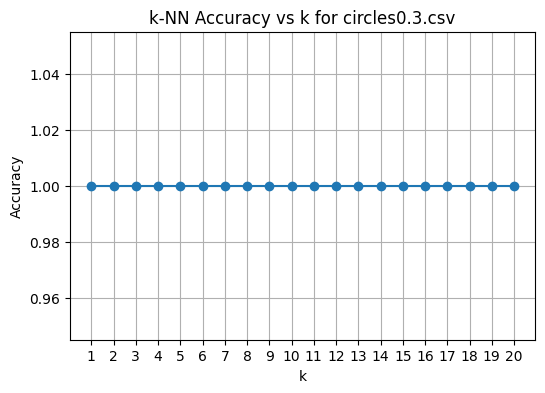

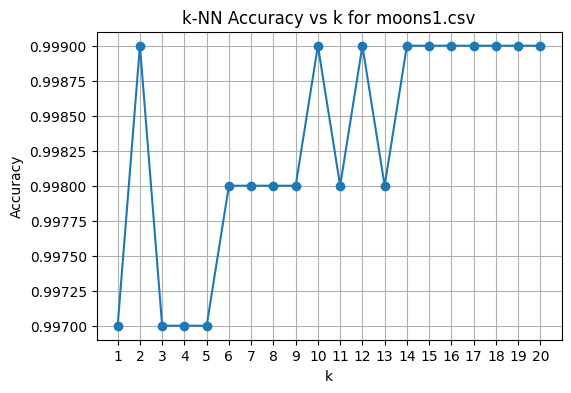

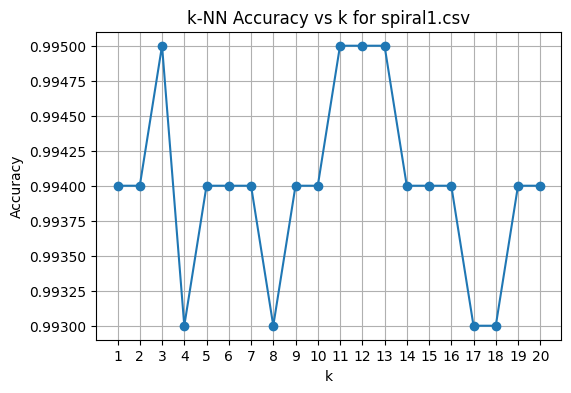

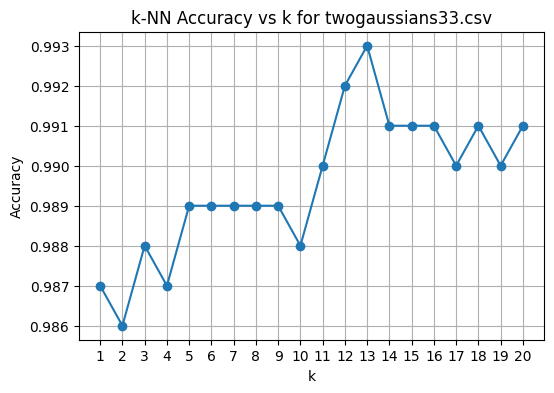

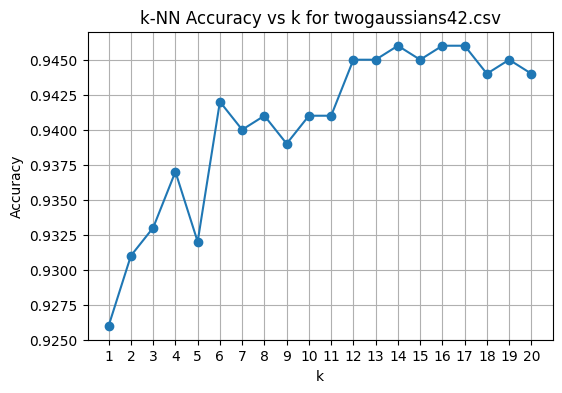

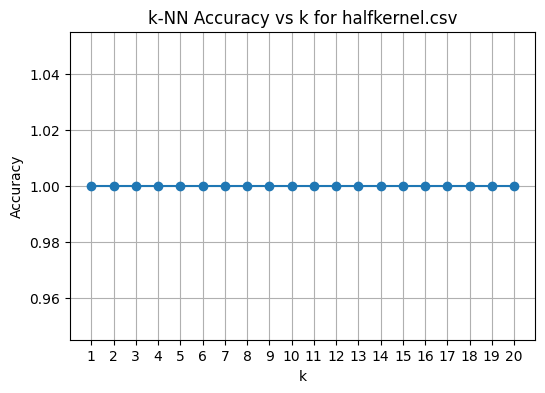

In [26]:
#Plot accuracy vs k
import matplotlib.pyplot as plt

for name, results in knn_results.items():
    ks = list(results.keys())
    accs = list(results.values())

    plt.figure(figsize=(6,4))
    plt.plot(ks, accs, marker='o')
    plt.title(f'k-NN Accuracy vs k for {name}')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.xticks(ks)
    plt.grid(True)
    plt.show()